In [1]:
import sys
sys.path.append(".")

In [2]:
# Imports 
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import skimage.transform
from PIL import Image

In [3]:
from omegaconf import OmegaConf
config_path = "logs/2020-11-07T00-08-54_cocostuffthings_vqvae_segmentation_bce/configs/2021-02-08T17-18-53-project.yaml"
config = OmegaConf.load(config_path)
import yaml
#print(yaml.dump(OmegaConf.to_container(config)))

In [ ]:
from taming.models.cond_transformer import Net2NetTransformer
model = Net2NetTransformer(**config.model.params)
model.eval()

TypeError: VQModel.__init__() got an unexpected keyword argument 'first_stage_key'

In [5]:
ckpt_path = "logs/2020-11-07T00-08-54_cocostuffthings_vqvae_segmentation_bce/checkpoints/last.ckpt"
sd = torch.load(ckpt_path, map_location="cpu")["state_dict"]
missing, unexpected = model.load_state_dict(sd, strict=False)

In [6]:

image_path = "./Images/squirrel.jpg"
img = np.array(Image.open(image_path).resize((256, 256)))
inp =  torch.tensor(img.transpose(2,0,1)[None]).to(dtype=torch.float32, device=model.device)


In [7]:
z, indices = model.encode_to_z(inp)
print(z.shape)
x_rec = model.decode_to_img(indices, z.shape)

torch.Size([1, 256, 16, 16])


In [16]:
print(x_rec.min(), x_rec.max())

tensor(0.0027) tensor(5.2707)


(256, 256, 3)


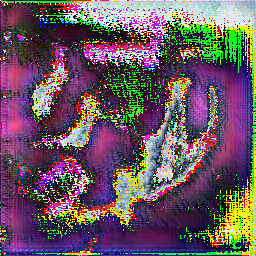

In [14]:
def preprocess_vqgan(x):
  x = 2.*(x-x.min())/(x.max()-x.min()) - 1.
  return x

x = x_rec.detach().cpu()

img_arr = (((x.numpy()[0] + 1)/2) * 255).astype(np.uint8)
img_arr = img_arr.transpose(1, 2, 0)
print(img_arr.shape)
img_rec = Image.fromarray(img_arr)
if not img_rec.mode == "RGB":   
    img_rec = img_rec.convert("RGB")
display(img_rec)